## Create Dataframe \& columns for all particles.

In [2]:
import os 
print("current working directory: ", os.getcwd())
os.chdir("/w/halld-scshelf2101/home/dbarton/gluex/analysis")
print("changed directory to: ", os.getcwd())
print(os.listdir())

current working directory:  /w/halld-scshelf2101/home/dbarton/gluex/analysis
changed directory to:  /w/halld-scshelf2101/home/dbarton/gluex/analysis
['KKpi_event_selection.pdf', 'f1_flat_bx2_analysis.C', 'voigtianRoo.C', 'KKpi_flat_bx2_analysis.ipynb', 'KKpi_flat_bx2_resonanceSelection.C', 'pipkmks_flat_bx2_analysis.py', 'voigtian.C', '.kayonPlotting.ipynb.icloud', 'KKpi_flat_bx2_analysis.C', 'DSelector_omegaEta.C', 'KKpi_flat_bestX2_columnHeaders.txt', 'KKpi_flat_bx2_analysis.py', 'tree_pipkmks__B4_M16_042077.root', 'readROOT_TreesHeaders.ipynb', 'readTTreeHeaders_anyTFile.C', 'KKpi_flat_bestX2_2017.root', 'tree_pipkmks__B4_M16_042011Headers.txt', 'KKpi_flat_bx2_analysis_secondVoigtian.C', 'functionsVarious.C', '.kayon_momentum.ipynb.icloud']


In [3]:
# import warnings # for debugging
# warnings.filterwarnings('error') # prints line number of warning, supposedly


import numpy as np
import ROOT
ROOT.EnableImplicitMT() # Enable multi-threading

def buildDataFrame(fileName, treeName):
    df = ROOT.RDataFrame(treeName, fileName)

    df = df.Define('pip2_m2', 'pip2_E*pip2_E - pip2_px*pip2_px - pip2_py*pip2_py - pip2_pz*pip2_pz') \
           .Define('pim_m2', 'pim_E*pim_E - pim_px*pim_px - pim_py*pim_py - pim_pz*pim_pz') \
           .Define('ks_E', 'pip2_E + pim_E') \
           .Define('ks_px', 'pip2_px + pim_px') \
           .Define('ks_py', 'pip2_py + pim_py') \
           .Define('ks_pz', 'pip2_pz + pim_pz') \
           .Define('ks_m', 'TMath::Sqrt(ks_E*ks_E - ks_px*ks_px - ks_py*ks_py - ks_pz*ks_pz)') \
           .Define('ks_m2', 'ks_E*ks_E - ks_px*ks_px - ks_py*ks_py - ks_pz*ks_pz') \
           .Define('delta_E', 'pip1_E + p_E') \
           .Define('delta_px', 'pip1_px + p_px') \
           .Define('delta_py', 'pip1_py + p_py') \
           .Define('delta_pz', 'pip1_pz + p_pz') \
           .Define('delta_m', 'TMath::Sqrt(delta_E*delta_E - delta_px*delta_px - delta_py*delta_py - delta_pz*delta_pz)') \
           .Define('delta_m2', 'delta_E*delta_E - delta_px*delta_px - delta_py*delta_py - delta_pz*delta_pz') \
           .Define('lambda_E', 'p_E + km_E') \
           .Define('lambda_px', 'p_px + km_px') \
           .Define('lambda_py', 'p_py + km_py') \
           .Define('lambda_pz', 'p_pz + km_pz') \
           .Define('lambda_m', 'TMath::Sqrt(lambda_E*lambda_E - lambda_px*lambda_px - lambda_py*lambda_py - lambda_pz*lambda_pz)') \
           .Define('lambda_m2', 'lambda_E*lambda_E - lambda_px*lambda_px - lambda_py*lambda_py - lambda_pz*lambda_pz') \
           .Define('kmpip1_E', 'pip1_E + km_E') \
           .Define('kmpip1_px', 'pip1_px + km_px') \
           .Define('kmpip1_py', 'pip1_py + km_py') \
           .Define('kmpip1_pz', 'pip1_pz + km_pz') \
           .Define('kmpip1_m', 'TMath::Sqrt(kmpip1_E*kmpip1_E - kmpip1_px*kmpip1_px - kmpip1_py*kmpip1_py - kmpip1_pz*kmpip1_pz)') \
           .Define('kmpip1_m2', 'kmpip1_E*kmpip1_E - kmpip1_px*kmpip1_px - kmpip1_py*kmpip1_py - kmpip1_pz*kmpip1_pz') \
           .Define('kspip1_E', 'pip1_E + ks_E') \
           .Define('kspip1_px', 'pip1_px + ks_px') \
           .Define('kspip1_py', 'pip1_py + ks_py') \
           .Define('kspip1_pz', 'pip1_pz + ks_pz') \
           .Define('kspip1_m', 'TMath::Sqrt(kspip1_E*kspip1_E - kspip1_px*kspip1_px - kspip1_py*kspip1_py - kspip1_pz*kspip1_pz)') \
           .Define('kspip1_m2', 'kspip1_E*kspip1_E - kspip1_px*kspip1_px - kspip1_py*kspip1_py - kspip1_pz*kspip1_pz') \
           .Define('KKpi_E', 'pip1_E + km_E + ks_E') \
           .Define('KKpi_px', 'pip1_px + km_px + ks_px') \
           .Define('KKpi_py', 'pip1_py + km_py + ks_py') \
           .Define('KKpi_pz', 'pip1_pz + km_pz + ks_pz') \
           .Define('KKpi_m', 'TMath::Sqrt(KKpi_E*KKpi_E - KKpi_px*KKpi_px - KKpi_py*KKpi_py - KKpi_pz*KKpi_pz)') \
           .Define('KKpi_m2', 'KKpi_E*KKpi_E - KKpi_px*KKpi_px - KKpi_py*KKpi_py - KKpi_pz*KKpi_pz')

    return df

dfKKpi = buildDataFrame("KKpi_flat_bestX2_2017.root", "pipkmks__B4_M16;1")


Welcome to JupyROOT 6.24/04


## Define Cuts

In [4]:
# Define cuts

pathlength_sig = 'pathlength_sig > 5' # pathlength significance cut
reject_delta = 'delta_m > 1.4' # delta++ cut
reject_lambda = 'lambda_m > 1.9' # lambda cut
keep_kstar_plus = 'kspip1_m >= 0.8 && kspip1_m <= 1.0' # "charged" K*(KsPi+)
keep_kstar_zero = 'kmpip1_m >= 0.8 && kmpip1_m <= 1.0' # "neutral" K*(K-Pi+)
reject_kstar_plus = 'kspip1_m <= 0.8 || kspip1_m >= 1.0' # Reject "charged" K*(KsPi+)
reject_kstar_zero = 'kmpip1_m <= 0.8 || kmpip1_m >= 1.0' # Reject "neutral" K*(K-Pi+)
select_kShort = 'ks_m >= 0.45 && ks_m <= 0.55' # Select kShort
reject_kShort = 'ks_m <= 0.45 || ks_m >= 0.55' # Reject kShort
select_KKpi = 'KKpi_m >= 1.0 && KKpi_m <= 1.8' # Select KKpi



### Histogram - kShort

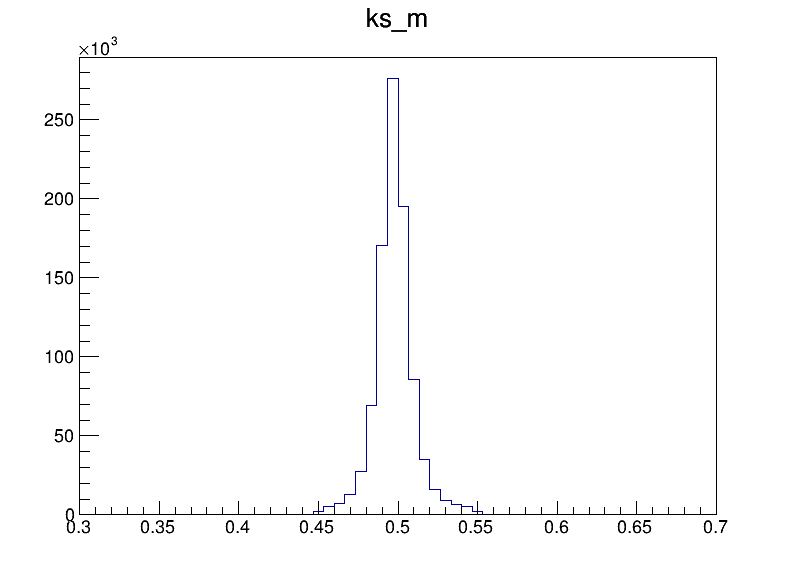

Info in <TCanvas::Print>: png file ../_plots/_TESThistogram.png has been created


In [5]:
from IPython.display import Image, display

def analysis(df):

    ######## APPLY CUTS ########
    dfFiltered = df.Filter(pathlength_sig).Filter(select_kShort) \
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('ks_m', 'ks_m', 60, 0.3, 0.7), 'ks_m')
    h1.SetStats(False)
    h1.Draw()

    img_path = "../_plots/_TESThistogram.png"
    canvas.SaveAs(img_path)  # Saves the canvas as an image
    canvas.Close()

    display(Image(filename=img_path))


analysis(dfKKpi)


### Histogram - KK $\pi$

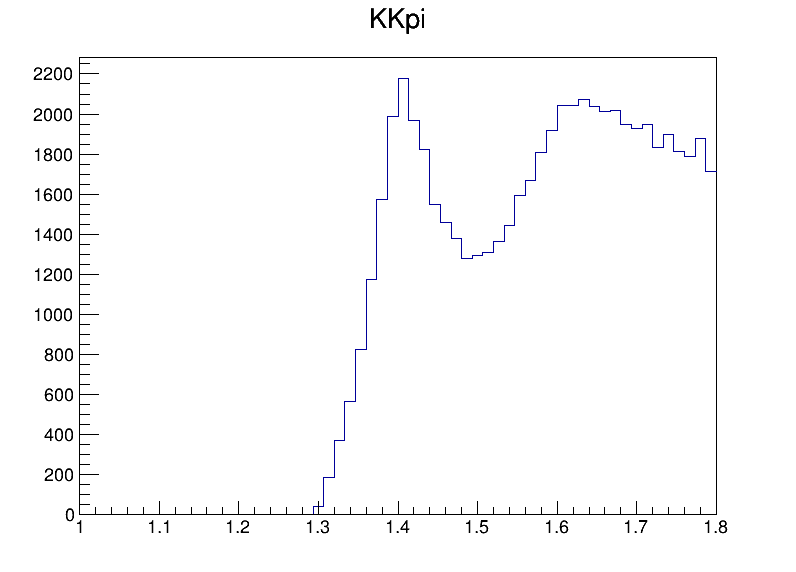

Info in <TCanvas::Print>: png file ../_plots/KKpi.png has been created


In [6]:
from IPython.display import Image, display

def plotting(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(keep_kstar_plus).Filter(reject_kstar_zero).Filter(select_kShort).Filter(pathlength_sig).Filter(reject_delta).Filter(reject_lambda)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('KKpi_m', 'KKpi', 60, 1.0, 1.8), 'KKpi_m')
    h1.SetStats(False)
    h1.Draw()
    
    img_path = "../_plots/KKpi.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

plotting(dfKKpi)

### Dalitz Plots - (kShort  +  $\pi^{+}$) vs. (kMinus + $\pi^{+}$)

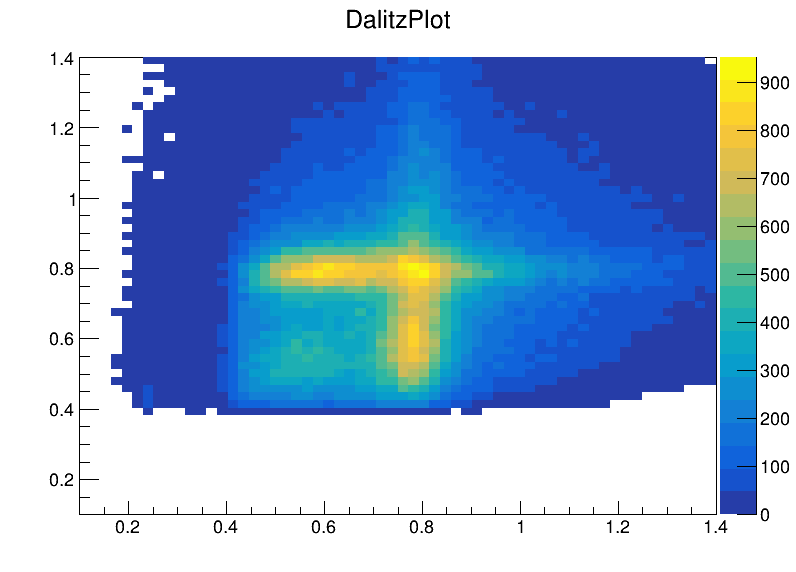

Info in <TCanvas::Print>: png file ../_plots/_dalitzTEST.png has been created


In [7]:
from IPython.display import Image, display

def dalitzPlot(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(pathlength_sig).Filter(select_KKpi)
    ############################

    h2 = dfFiltered.Histo2D(('DalitzPlot', 'DalitzPlot', 60, 0.1, 1.4, 60, 0.1, 1.4), 'kspip1_m2', 'kmpip1_m2')
    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h2.SetStats(False)
    h2.Draw("colz")
    canvas.Update()
    
    img_path = "../_plots/_dalitzTEST.png"
    canvas.SaveAs(img_path)
    canvas.Draw()
    # canvas.Close()
    

    # # Display the saved image
    display(Image(filename=img_path))

dalitzPlot(dfKKpi)

## Fitting: define functions

In [8]:
# Create various functions from 'ROOT' framework for fitting to histograms

# Breit-Wigner function
bw = ROOT.TF1("bw", "breitwigner(0)", 1.2, 1.7); # used to have BreitWigner(x, [4], [5])
# bw = ROOT.TF1("bw", "TMath::BreitWigner(x, [0], [1])", 0.4, 0.6)

# Exponential
exp = ROOT.TF1("exp", "TMath::Exp([0] + [1] * x + [2] * x * x)", 1.2, 1.7) # old c++ code defines this exponential as 'bkg'
exp.SetParName(0, "expPar1")
exp.SetParName(1, "expPar2")
exp.SetParName(2, "expPar3")

# Voigtian function
voigtian = ROOT.TF1("voigtian", "[0]*TMath::Voigt(x - [1], [2], [3])", 1.2, 1.7)
voigtian.SetParName(0, "voigtian_amplitude")
voigtian.SetParName(1, "voigtian_mean") # 'mean' is the offset that places the peak at the correct position, where we know the resonance to be.  It represents the particles mass.
voigtian.SetParName(2, "voigtian_sigma") # 'sigma' is the gaussian width (detector resolution)
voigtian.SetParName(3, "voigtian_width") # ?? 'width' is the lorentzian width (natural width of the particle) ??

# Voigtian with RooVoigtian
# ???

######## COMBINED FUNCTIONS ########

# Voigtian + Exponential(3 parameters)
voigtian_plus_exp = ROOT.TF1("voigt_plus_expo3", "voigtian + exp", 0.1, 1.8)
voigtian_plus_exp.SetParameter(0, 4.5E2)
voigtian_plus_exp.SetParameter(1, 1.45807E0)
voigtian_plus_exp.SetParameter(2, 1.0E-02)
voigtian_plus_exp.SetParameter(3, 3.81110E-06)
voigtian_plus_exp.SetParameter(4, -6.47E0)
voigtian_plus_exp.SetParameter(5, 9.29E0)
voigtian_plus_exp.SetParameter(6, -2.970E0)

## Fitting: plots

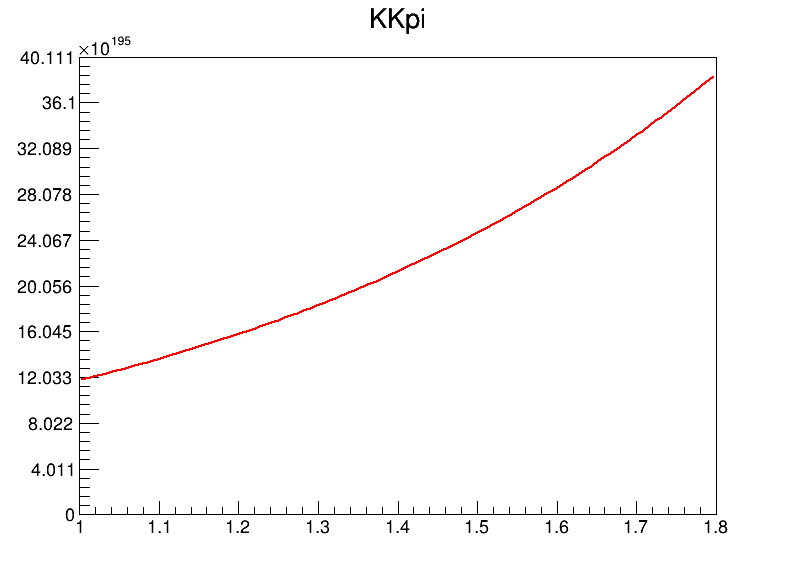

 **********
 **    1 **SET PRINT           2
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 expPar1      4.50000e+02  1.35000e+02     no limits
     2 expPar2      1.45807e+00  4.37421e-01     no limits
     3 expPar3      1.00000e-02  3.00000e-03     no limits
     4 voigtian_amplitude   3.81110e-06  1.14333e-06     no limits
     5 voigtian_mean  -6.47000e+00  1.94100e+00     no limits
     6 voigtian_sigma   9.29000e+00  2.78700e+00     no limits
     7 voigtian_width  -2.97000e+00  8.91000e-01     no limits
 **********
 **    3 **SET ERR           1
 **********
 **********
 **    4 **SET PRINT           2
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1945        0.01
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATI

Info in <TMinuitMinimizer::Minimize>: Finished to run MIGRAD - status 0
Info in <TMinuitMinimizer::Minimize>: Finished to run HESSE - status 0
Info in <TCanvas::Print>: png file ../_plots/_KKpi_FIT_TEST.png has been created


In [9]:
# Change all my code to lazy execution, i.e. no functions, instead just put histos in a cell, then drawing, etc, in another cell

from IPython.display import Image, display

def fitting(df):
    
    ######## APPLY CUTS ########
    dfFiltered = df.Filter(keep_kstar_plus).Filter(reject_kstar_zero).Filter(select_kShort).Filter(pathlength_sig).Filter(reject_delta).Filter(reject_lambda)
    ############################

    canvas = ROOT.TCanvas("c", "c", 800, 600)
    h1 = dfFiltered.Histo1D(('KKpi_m', 'KKpi', 60, 1.0, 1.8), 'KKpi_m')
    h1.SetStats(False)
    h1.Fit(voigtian_plus_exp, "RV")
    h1.Draw()
    voigtian_plus_exp.Draw("same")
    
    img_path = "../_plots/_KKpi_FIT_TEST.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

fitting(dfKKpi)